In [2]:
# import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1st step to connect with kaggleApi and download the dataset 

In [3]:
# Import data from kaggle
# !pip install kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('ankushpanday1/appendix-cancer-prediction-dataset', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ankushpanday1/appendix-cancer-prediction-dataset


### Load the Dataset

In [4]:
# Load the dataset
df=pd.read_csv(r'appendix_cancer_prediction_dataset.csv')

In [5]:
# Display the first 5 rows of the dataset
df.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [6]:
# Info about the df..
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [7]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,260000.0,53.443331,20.750951,18.0,36.0,53.0,71.0,89.0
BMI,260000.0,24.996457,4.997116,1.1,21.6,25.0,28.4,48.1
Blood_Pressure,260000.0,134.490342,25.961207,90.0,112.0,134.0,157.0,179.0
Cholesterol_Level,260000.0,224.477227,43.266553,150.0,187.0,224.0,262.0,299.0
White_Blood_Cell_Count,260000.0,7.000596,1.496819,0.5,6.0,7.0,8.0,13.7
Red_Blood_Cell_Count,260000.0,4.999148,0.501531,2.8,4.7,5.0,5.3,7.6
Platelet_Count,260000.0,274.433846,72.207496,150.0,212.0,275.0,337.0,399.0
Diagnosis_Delay_Days,260000.0,365.181450,210.924211,0.0,182.0,366.0,548.0,729.0
Survival_Years_After_Diagnosis,260000.0,4.989499,4.976837,0.0,1.4,3.5,6.9,67.8


In [8]:
# Check for missing values
df.isnull().sum()

Patient_ID                             0
Country                                0
Age                                    0
Gender                                 0
BMI                                    0
Smoking_Status                         0
Alcohol_Consumption                    0
Family_History_Cancer                  0
Genetic_Mutations                      0
Chronic_Diseases                  130087
Physical_Activity_Level                0
Diet_Type                              0
Radiation_Exposure                     0
Previous_Cancers                       0
Blood_Pressure                         0
Cholesterol_Level                      0
White_Blood_Cell_Count                 0
Red_Blood_Cell_Count                   0
Platelet_Count                         0
Tumor_Markers                          0
Symptom_Severity                       0
Diagnosis_Delay_Days                   0
Treatment_Type                     26074
Survival_Years_After_Diagnosis         0
Appendix_Cancer_

In [9]:
# Drop the Columns with alot of missing values and the columns that are not needed
df = df.drop(['Patient_ID','Country','Chronic_Diseases', 'Treatment_Type'], axis=1)

In [10]:
# check for missing values after filling the missing values
df.isnull().sum()

Age                               0
Gender                            0
BMI                               0
Smoking_Status                    0
Alcohol_Consumption               0
Family_History_Cancer             0
Genetic_Mutations                 0
Physical_Activity_Level           0
Diet_Type                         0
Radiation_Exposure                0
Previous_Cancers                  0
Blood_Pressure                    0
Cholesterol_Level                 0
White_Blood_Cell_Count            0
Red_Blood_Cell_Count              0
Platelet_Count                    0
Tumor_Markers                     0
Symptom_Severity                  0
Diagnosis_Delay_Days              0
Survival_Years_After_Diagnosis    0
Appendix_Cancer_Prediction        0
dtype: int64

### Seperate the Categorical columns 

In [11]:
# Categorical columns
categorical = df.select_dtypes(include ='object').columns
print(categorical)

# Numerical columns
numerical = df.select_dtypes(include = 'number').columns
print(numerical)

Index(['Gender', 'Smoking_Status', 'Alcohol_Consumption',
       'Family_History_Cancer', 'Genetic_Mutations', 'Physical_Activity_Level',
       'Diet_Type', 'Radiation_Exposure', 'Previous_Cancers', 'Tumor_Markers',
       'Symptom_Severity', 'Appendix_Cancer_Prediction'],
      dtype='object')
Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol_Level',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Platelet_Count',
       'Diagnosis_Delay_Days', 'Survival_Years_After_Diagnosis'],
      dtype='object')


### Check unique values in the categorical columns

In [12]:
for column in df.columns:
    if df[column].dtype == object:
        print(df[column].value_counts())
        print("_________________________________________________________________")


Gender
Female    127597
Male      127170
Other       5233
Name: count, dtype: int64
_________________________________________________________________
Smoking_Status
No     182277
Yes     77723
Name: count, dtype: int64
_________________________________________________________________
Alcohol_Consumption
Low         130168
Moderate    103666
High         26166
Name: count, dtype: int64
_________________________________________________________________
Family_History_Cancer
No     207381
Yes     52619
Name: count, dtype: int64
_________________________________________________________________
Genetic_Mutations
No     233989
Yes     26011
Name: count, dtype: int64
_________________________________________________________________
Physical_Activity_Level
Low         103942
Moderate    103607
High         52451
Name: count, dtype: int64
_________________________________________________________________
Diet_Type
Non-Vegetarian    156349
Vegetarian         77879
Vegan              25772
Name: co

### Make visuals to see distribution of numerical features in the df

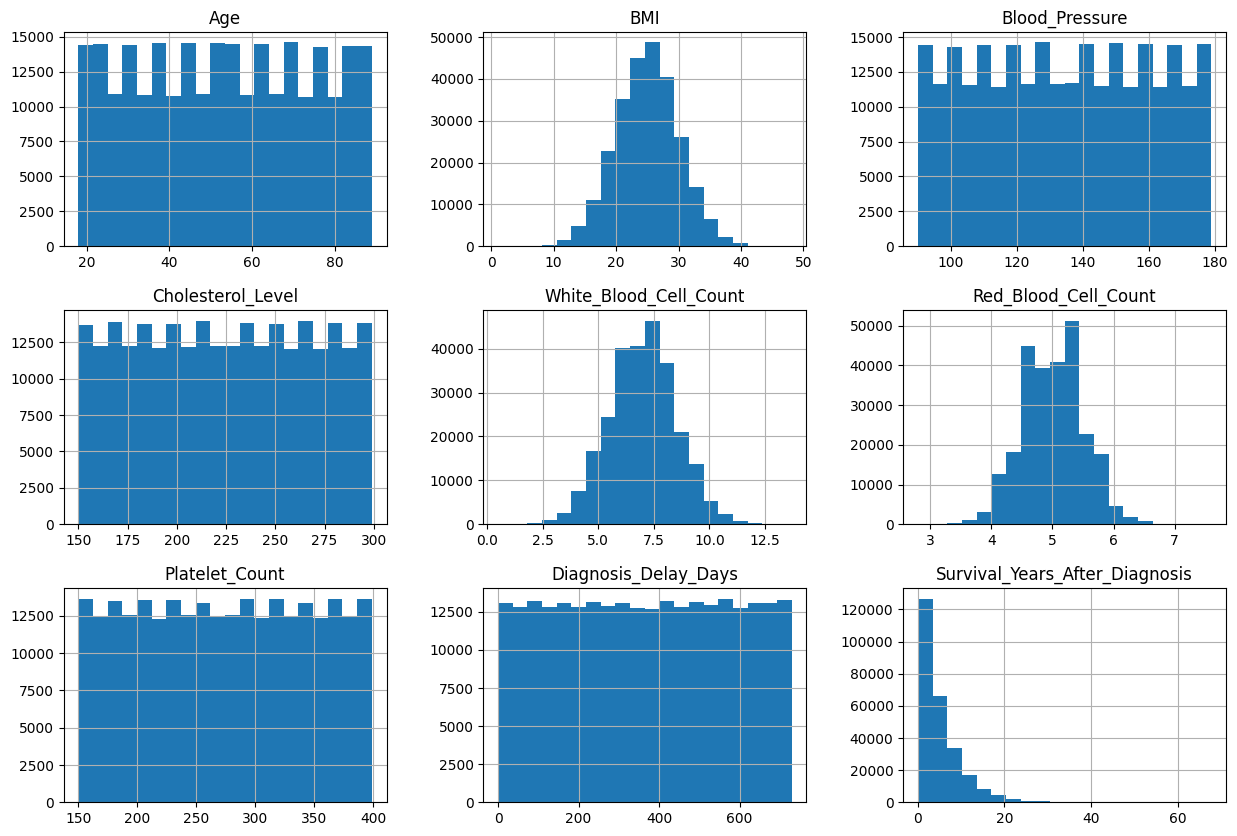

In [13]:
# distribution of numerical columns
df[numerical].hist(figsize=(15, 10), bins=20)
plt.show()


### Visualize the distribution of Categorical feature of DF

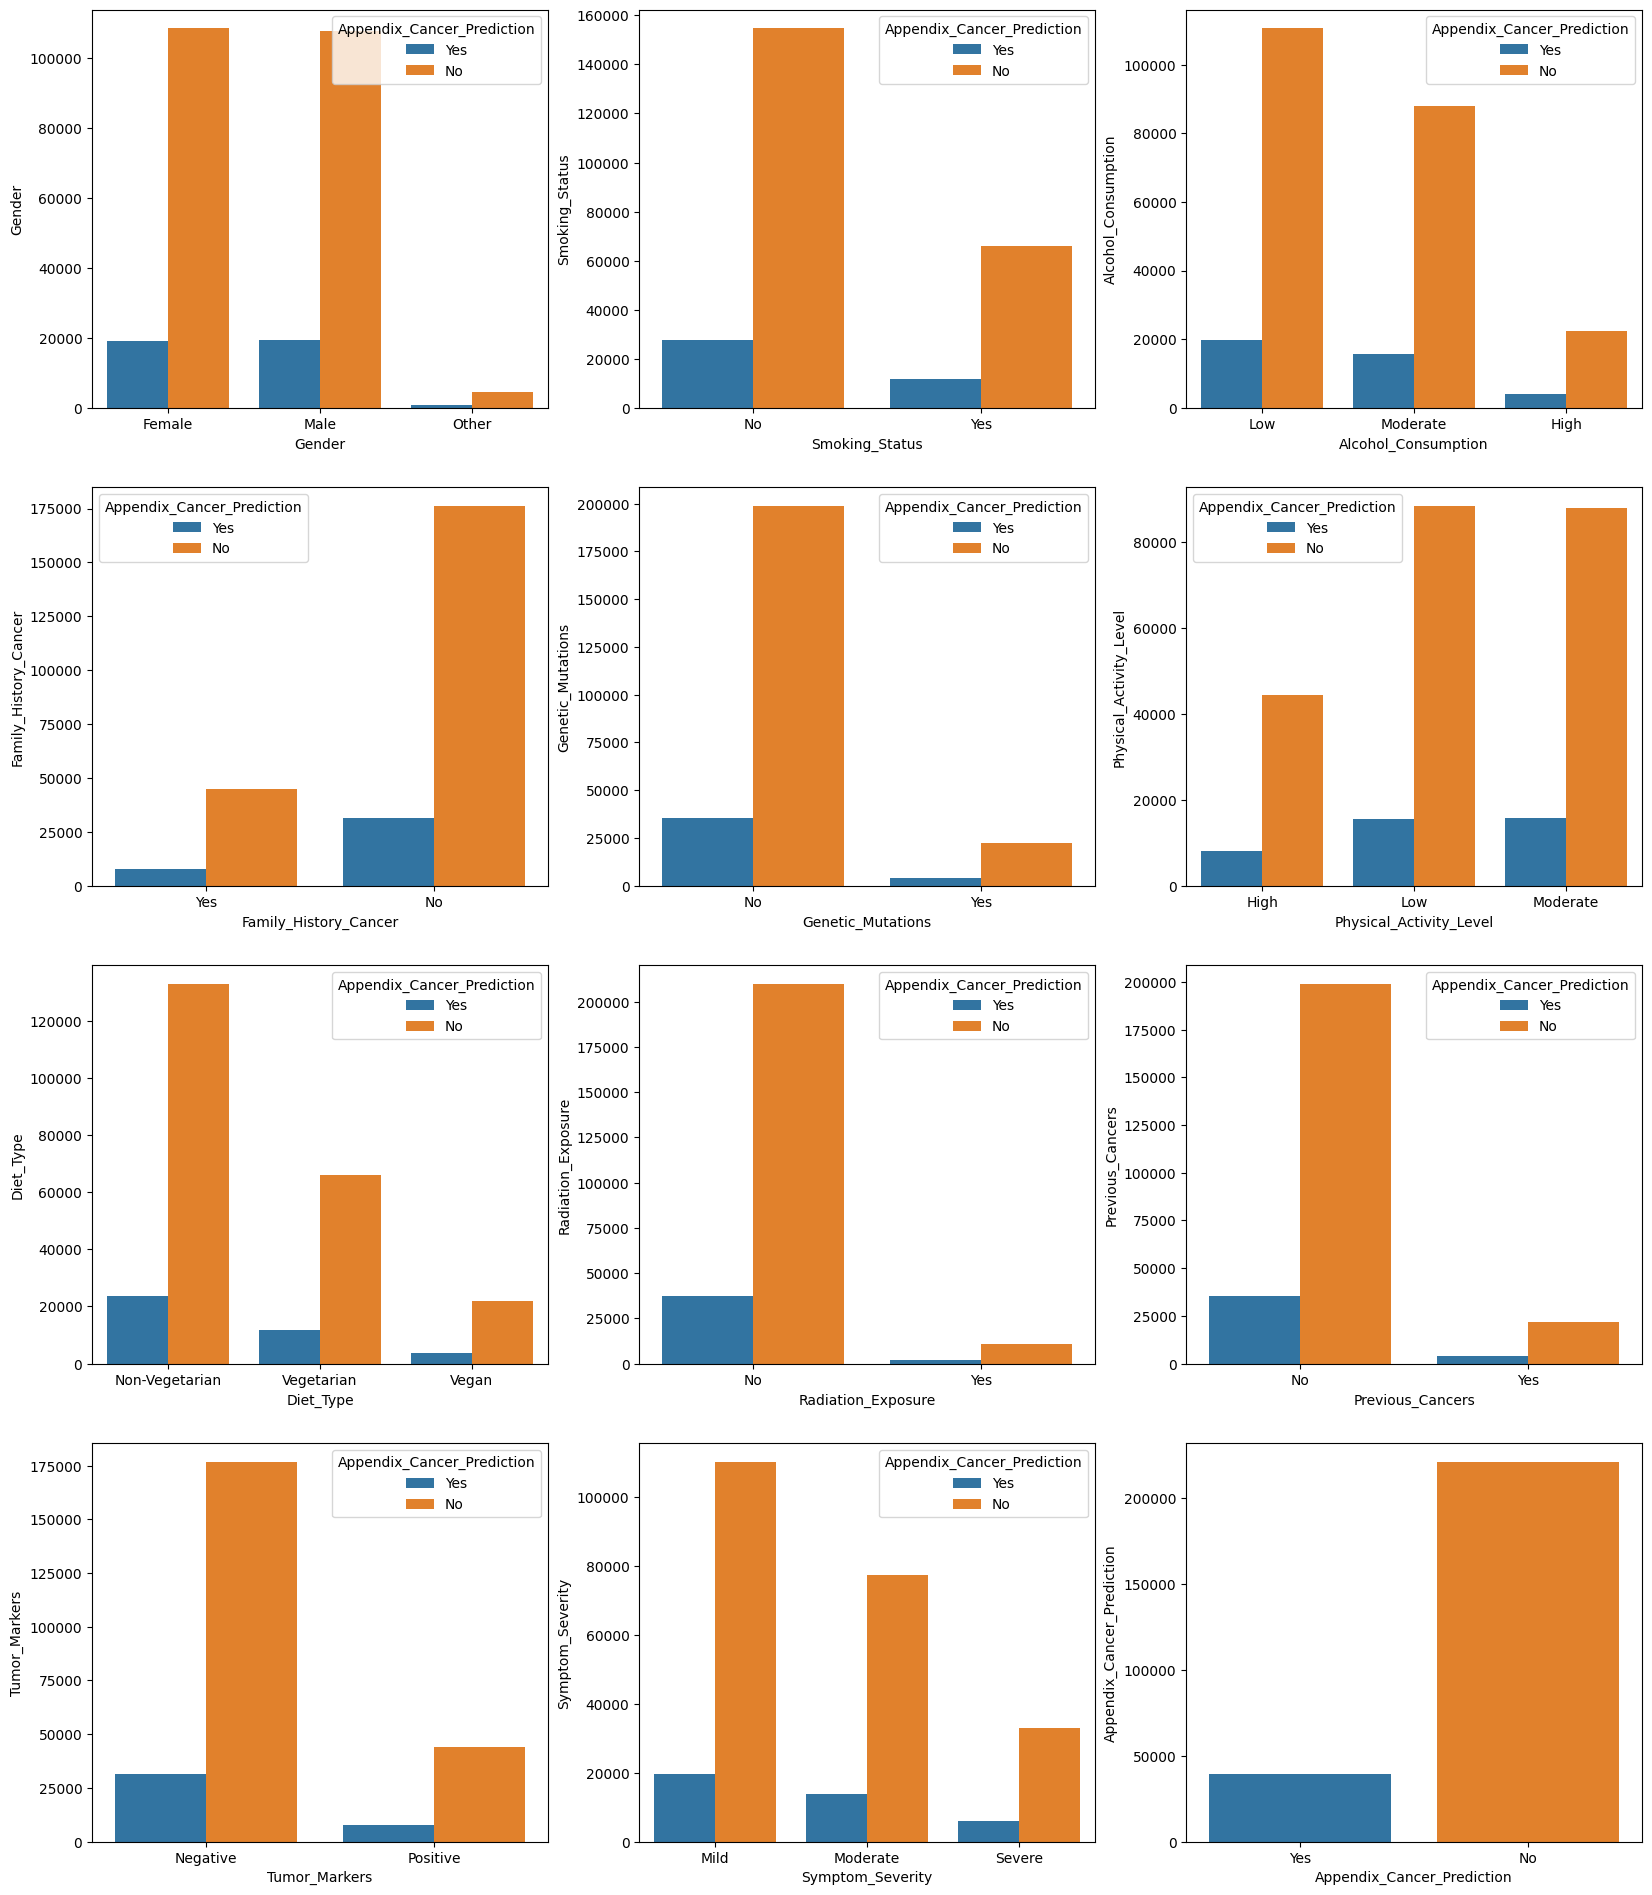

In [14]:
# distribution of categorical columns
plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col, hue=df["Appendix_Cancer_Prediction"])
    #sns.countplot(data=df, x=col)
    plt.ylabel(col) 
plt.show()

### I want to see the outliers of the Numerical feature

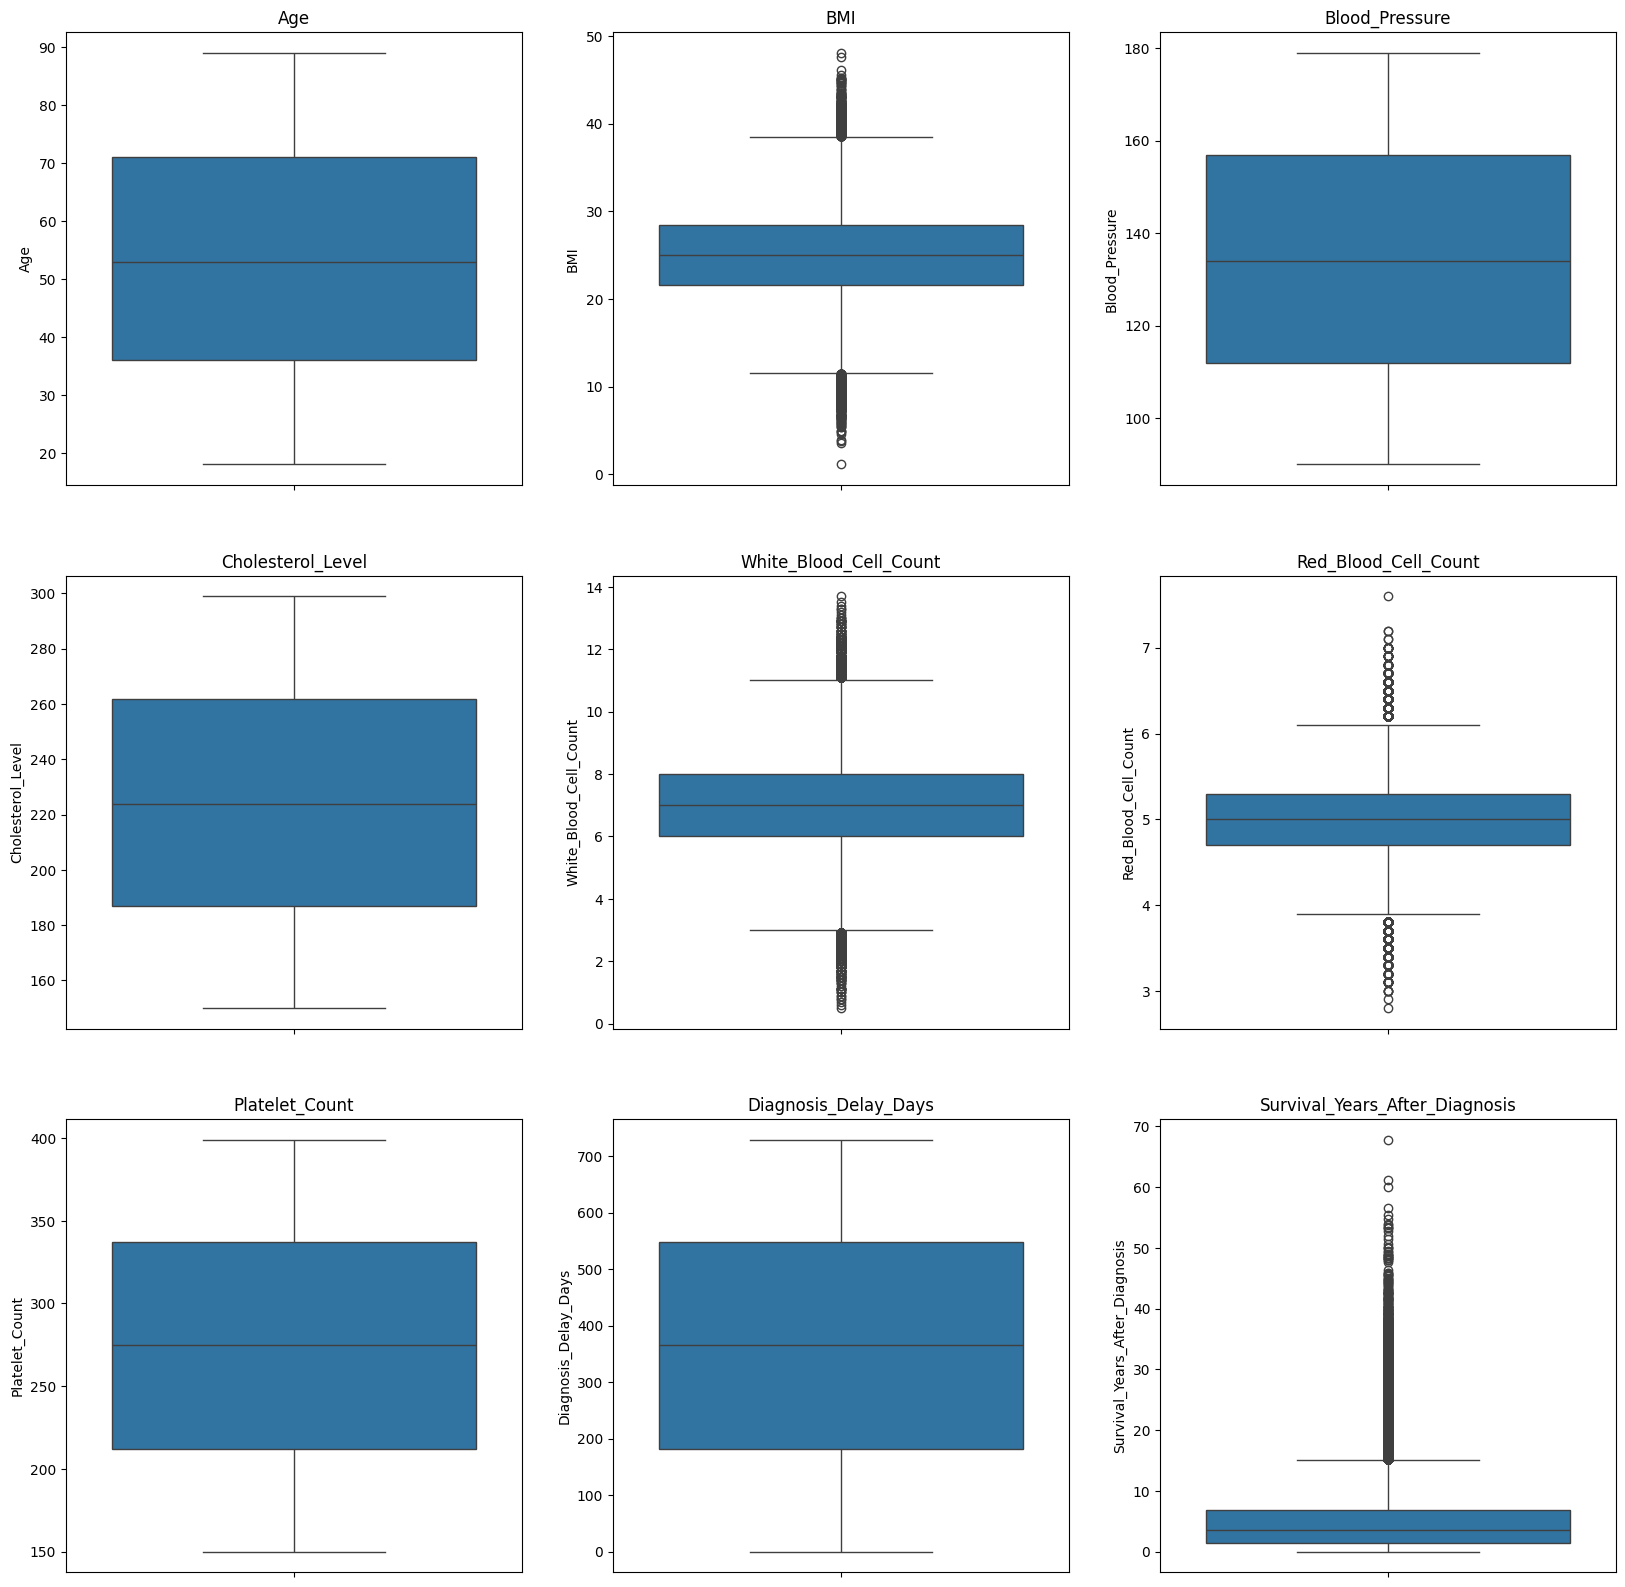

In [15]:
# check for outliers
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(column)

#### These box plots reveal that a few  variables like BMI, White blood cell count, Red blood cell count, and Survival years after diagnosis highlights some outlier.
### I want to calculate the outlier base on IQR and delete them

In [16]:
# Specify the features to check for outliers
features = ['BMI','White_Blood_Cell_Count', 'Red_Blood_Cell_Count','Survival_Years_After_Diagnosis']

# Function to remove outliers based on IQR
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remove outliers for the specified features
df_cleaned = remove_outliers(df, features)

### Visualize Numerical feature to see if they still having outliers??

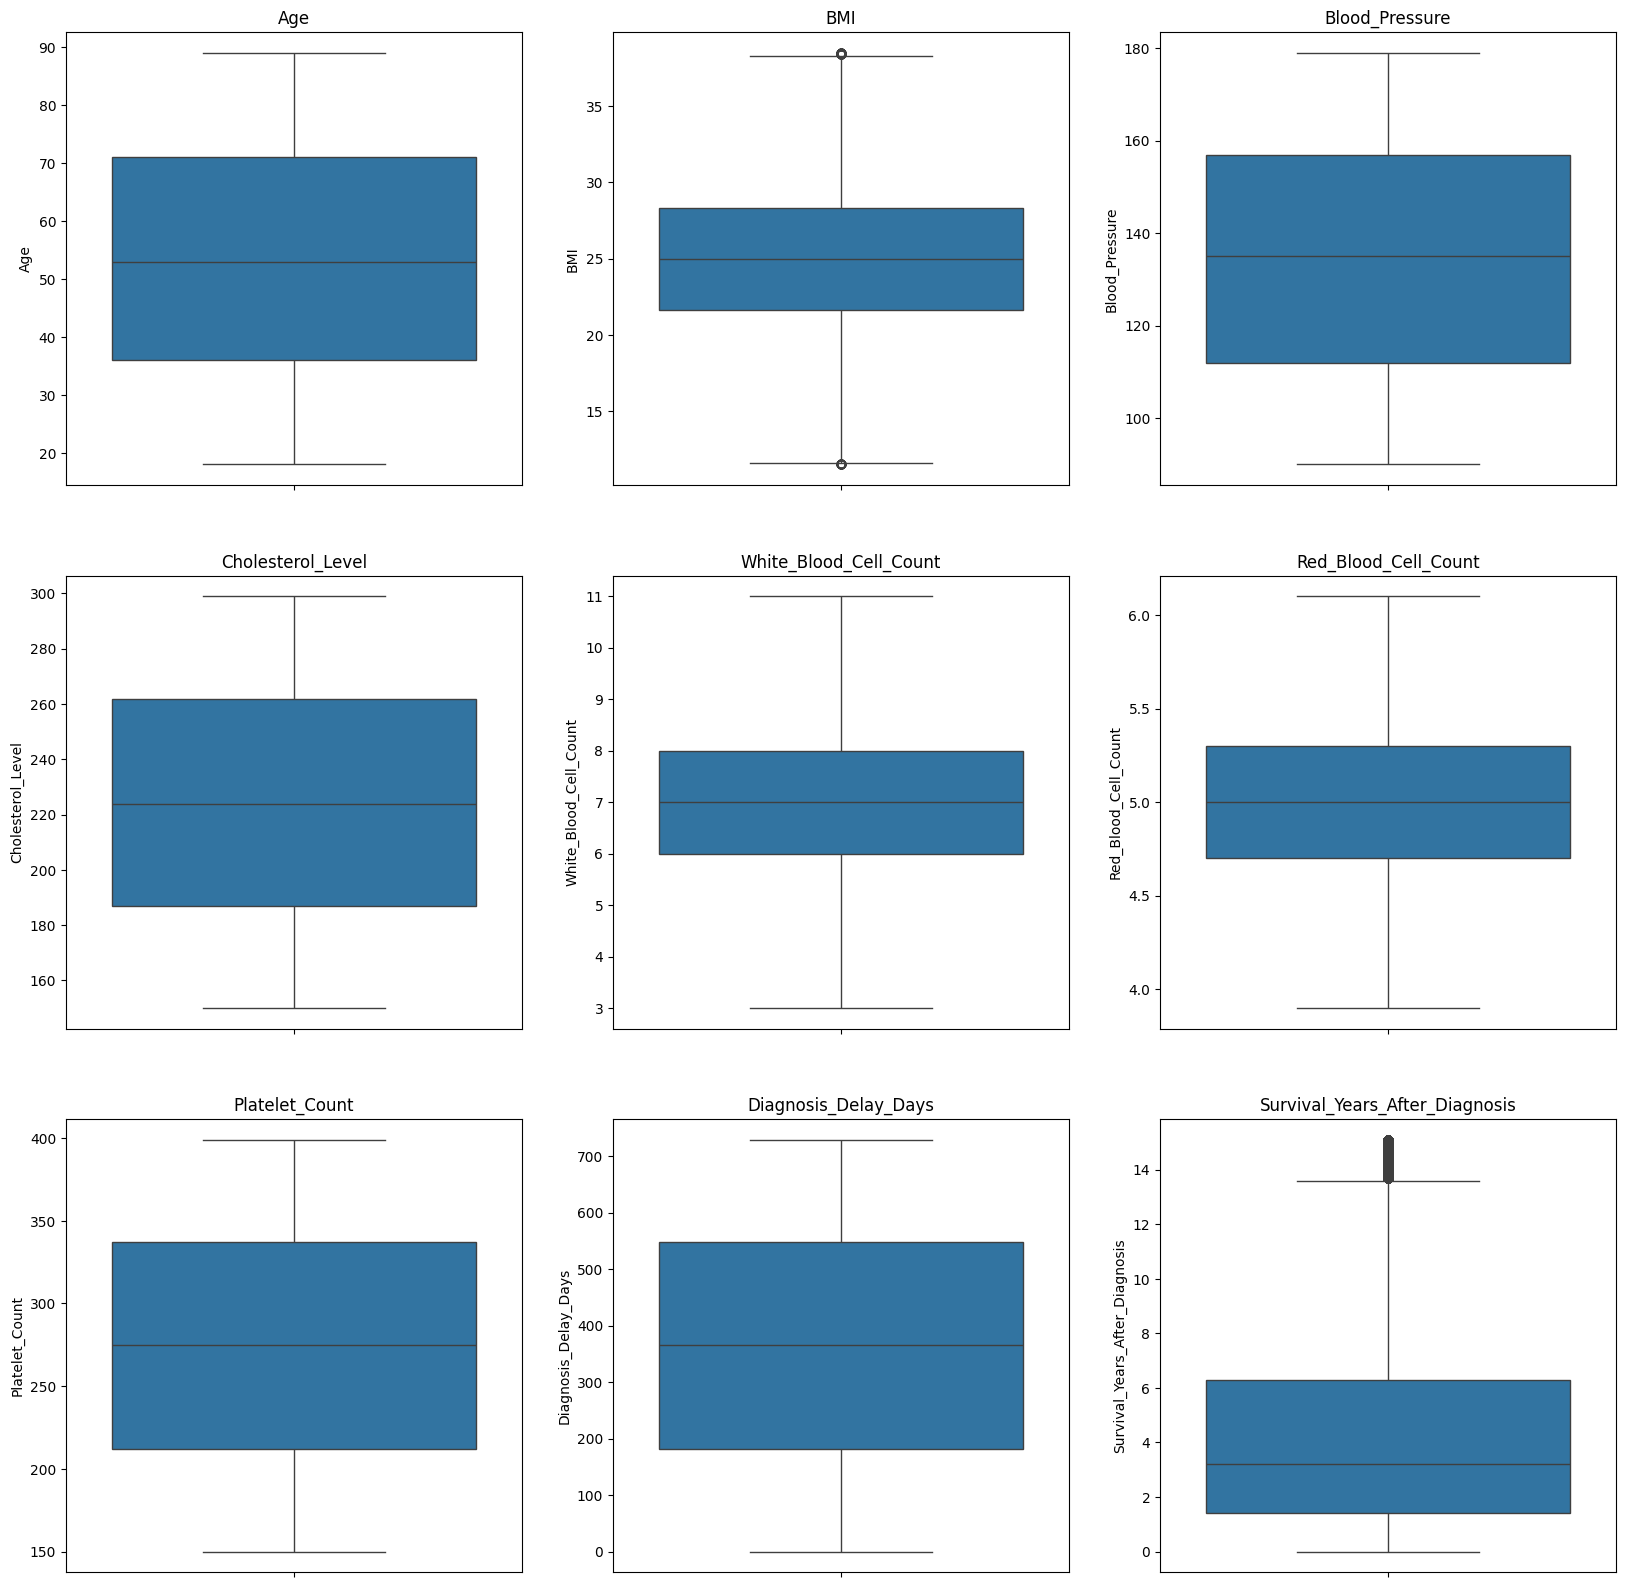

In [17]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_cleaned[column])
    plt.title(column)

### Now Need to encode our target variable( Appendix-Cencer_Prediction) using LabelEncoder

In [18]:
# Encode the target variable.
from sklearn.preprocessing import LabelEncoder
model_df = df_cleaned.copy()  # Create a copy of the cleaned dataset to avoid modifying the original dataset
target_col = 'Appendix_Cancer_Prediction'
le = LabelEncoder()
model_df[target_col] = le.fit_transform(model_df[target_col])
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238936 entries, 0 to 259999
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             238936 non-null  int64  
 1   Gender                          238936 non-null  object 
 2   BMI                             238936 non-null  float64
 3   Smoking_Status                  238936 non-null  object 
 4   Alcohol_Consumption             238936 non-null  object 
 5   Family_History_Cancer           238936 non-null  object 
 6   Genetic_Mutations               238936 non-null  object 
 7   Physical_Activity_Level         238936 non-null  object 
 8   Diet_Type                       238936 non-null  object 
 9   Radiation_Exposure              238936 non-null  object 
 10  Previous_Cancers                238936 non-null  object 
 11  Blood_Pressure                  238936 non-null  int64  
 12  Cholesterol_Level    

### Next Step to encode our categorical feature using pd.get_dommies..

In [19]:
# Identify the categorical columns
categorical = model_df.select_dtypes(include='object').columns
print("Categorical columns:", categorical)

# Encode the categorical variables using pd.get_dummies
model_df = pd.get_dummies(model_df, columns=categorical, drop_first=True)
print("\nEncoded DataFrame:")
print(model_df)


Categorical columns: Index(['Gender', 'Smoking_Status', 'Alcohol_Consumption',
       'Family_History_Cancer', 'Genetic_Mutations', 'Physical_Activity_Level',
       'Diet_Type', 'Radiation_Exposure', 'Previous_Cancers', 'Tumor_Markers',
       'Symptom_Severity'],
      dtype='object')

Encoded DataFrame:
        Age   BMI  Blood_Pressure  Cholesterol_Level  White_Blood_Cell_Count  \
0        67  28.6             156                228                     8.1   
2        52  17.2             115                231                     8.2   
3        71  31.8             149                151                     6.8   
4        19  17.7             179                236                     6.7   
5        44  21.2             113                270                     6.9   
...     ...   ...             ...                ...                     ...   
259995   33  22.3             136                159                     7.5   
259996   45  27.5             141                268

In [20]:
# Check dtypes of encoded features..
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238936 entries, 0 to 259999
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Age                               238936 non-null  int64  
 1   BMI                               238936 non-null  float64
 2   Blood_Pressure                    238936 non-null  int64  
 3   Cholesterol_Level                 238936 non-null  int64  
 4   White_Blood_Cell_Count            238936 non-null  float64
 5   Red_Blood_Cell_Count              238936 non-null  float64
 6   Platelet_Count                    238936 non-null  int64  
 7   Diagnosis_Delay_Days              238936 non-null  int64  
 8   Survival_Years_After_Diagnosis    238936 non-null  float64
 9   Appendix_Cancer_Prediction        238936 non-null  int32  
 10  Gender_Male                       238936 non-null  bool   
 11  Gender_Other                      238936 non-null  bool  

In [21]:
# As i see after encoding the categorical columns, the boolean columns are still in boolean format so 
# i will convert them to integer first
bool_cols = model_df.select_dtypes(include='bool').columns
model_df[bool_cols] = model_df[bool_cols].astype(int)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238936 entries, 0 to 259999
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Age                               238936 non-null  int64  
 1   BMI                               238936 non-null  float64
 2   Blood_Pressure                    238936 non-null  int64  
 3   Cholesterol_Level                 238936 non-null  int64  
 4   White_Blood_Cell_Count            238936 non-null  float64
 5   Red_Blood_Cell_Count              238936 non-null  float64
 6   Platelet_Count                    238936 non-null  int64  
 7   Diagnosis_Delay_Days              238936 non-null  int64  
 8   Survival_Years_After_Diagnosis    238936 non-null  float64
 9   Appendix_Cancer_Prediction        238936 non-null  int32  
 10  Gender_Male                       238936 non-null  int32  
 11  Gender_Other                      238936 non-null  int32 

In [22]:
# Split features and target
X = model_df.drop(target_col, axis=1)
y = model_df[target_col]

In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

## Now i will prepare our model using Logistic Regression

In [24]:
# Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, n_jobs=-1, verbose=1, max_iter=1000)) 
])

# Train the Logistic Regression model
logreg_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42,
                                    verbose=1))])

In [25]:
# Make predictions
y_pred_logreg = logreg_pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg) * 100:.2f}%')

Accuracy: 84.90%


### The logistic regression model show good accuracy. To compare with the model whichone i took as a refrence i have received a little bit higher accuracy.

## Now i want to see with different model like Lasso, Ridge, GradientBoostingClassifier, Random Forest and Cross vallidation, How this model are going to perform with same data structures.

In [26]:
# Lasso Regression Pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

# Train the Lasso Regression model
lasso_pipeline.fit(X_train, y_train)

# Make predictions and convert to binary (0 or 1)
y_pred_lasso = lasso_pipeline.predict(X_test)
y_pred_lasso = np.where(y_pred_lasso > 0.5, 1, 0)

# Evaluate the model
print('Lasso Regression:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_lasso) * 100:.2f}%')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_lasso))
#print('Classification report:')
#print(classification_report(y_test, y_pred_lasso))


Lasso Regression:
Accuracy: 84.90%
Confusion matrix:
[[60858     0]
 [10823     0]]


In [27]:
# Ridge Classifier Pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeClassifier(alpha=1.0, random_state=42, max_iter=1000))
])

# Train the Ridge Classifier model
ridge_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_pipeline.predict(X_test)

# Evaluate the model
print('Ridge Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_ridge) * 100:.2f}%')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_ridge))
#print('Classification report:')
#print(classification_report(y_test, y_pred_ridge))


Ridge Classifier:
Accuracy: 84.90%
Confusion matrix:
[[60858     0]
 [10823     0]]


In [28]:
# build a random forest model
# Random forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print('Random Forest:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%')



Random Forest:
Accuracy: 84.90%


#### The Random Forest model demonstrated a solid performance with an accuracy of 84.90%. The confusion matrix and classification report provided a comprehensive understanding of the model's strengths and weaknesses. The model shows good capability in correctly predicting the target variable, with a balanced precision and recall.

In [29]:
# Extract the coefficients of the logistic regression model
logreg = logreg_pipeline.named_steps['logreg']
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=['Coefficient'])

# Sort the coefficients by their absolute values in descending order
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print(coefficients)

                                  Coefficient
Gender_Male                          0.016826
Cholesterol_Level                    0.012393
Platelet_Count                       0.010377
Blood_Pressure                       0.008446
Alcohol_Consumption_Moderate         0.007528
Radiation_Exposure_Yes               0.005667
Gender_Other                         0.005651
Alcohol_Consumption_Low              0.002809
Symptom_Severity_Severe              0.002438
Symptom_Severity_Moderate            0.002212
Red_Blood_Cell_Count                 0.000571
Survival_Years_After_Diagnosis       0.000501
Diet_Type_Vegan                     -0.000005
Family_History_Cancer_Yes           -0.001754
Previous_Cancers_Yes                -0.002064
Tumor_Markers_Positive              -0.002495
Diet_Type_Vegetarian                -0.002805
Genetic_Mutations_Yes               -0.004085
BMI                                 -0.005692
White_Blood_Cell_Count              -0.006804
Diagnosis_Delay_Days              

                             Feature  Importance
7               Diagnosis_Delay_Days   11.252245
1                                BMI   10.740054
6                     Platelet_Count   10.255485
3                  Cholesterol_Level    9.590517
8     Survival_Years_After_Diagnosis    9.509379
4             White_Blood_Cell_Count    9.016966
2                     Blood_Pressure    8.552800
0                                Age    8.231765
5               Red_Blood_Cell_Count    6.829821
9                        Gender_Male    1.203989
23         Symptom_Severity_Moderate    1.151376
11                Smoking_Status_Yes    1.110330
22            Tumor_Markers_Positive    1.107597
19              Diet_Type_Vegetarian    1.097829
14         Family_History_Cancer_Yes    1.097016
16       Physical_Activity_Level_Low    1.093237
17  Physical_Activity_Level_Moderate    1.091734
12           Alcohol_Consumption_Low    1.067277
13      Alcohol_Consumption_Moderate    1.064174
24           Symptom

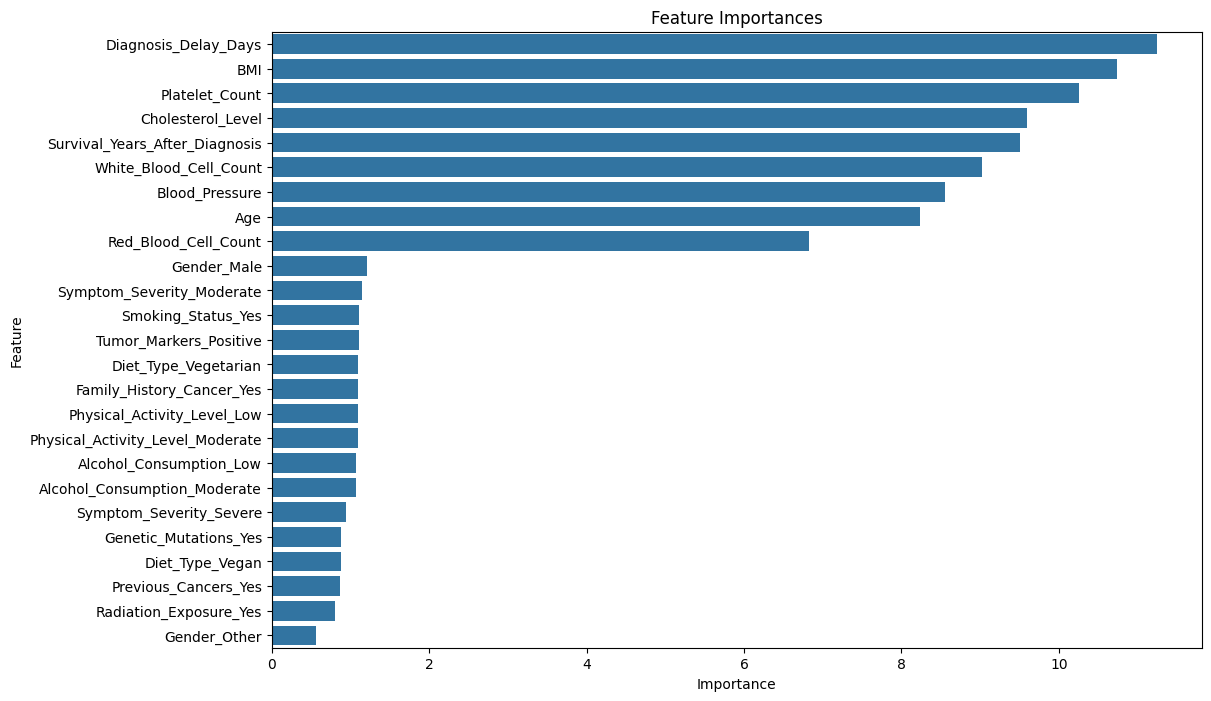

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000,max_depth=10)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_*100
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


#### The analysis highlights the key factors influencing the target variable, with Diagnosis_Delay_Days, BMI, Platelet_Count, Cholesterol_Level, and Survival_Years_After_Diagnosis being the top predictors.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbm=GradientBoostingClassifier()
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [1, 3],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_gbm_model = grid_search.best_estimator_
y_pred = best_gbm_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred)*100,"%")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10}
Best score: 0.8490030193666757
Accuracy: 84.90115930302312 %


### Check for Multicollinearity: Use the Variance Inflation Factor (VIF) to check for multicollinearity among features. Features with a VIF > 10 are typically considered highly collinear.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
target = 'Appendix_Cancer_Prediction'
features = model_df.columns.drop(target)
# Calculate VIF
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

calculate_vif(model_df[features])

,feature,VIF
0,Age,7.439680
1,BMI,24.696235
2,Blood_Pressure,24.954840
3,Cholesterol_Level,25.054288
4,White_Blood_Cell_Count,22.030925
5,Red_Blood_Cell_Count,64.884839
6,Platelet_Count,14.624523
7,Diagnosis_Delay_Days,3.957554
8,Survival_Years_After_Diagnosis,2.396571
9,Gender_Male,1.989258


#### Check may be which feature have high VIF are corelated each other....

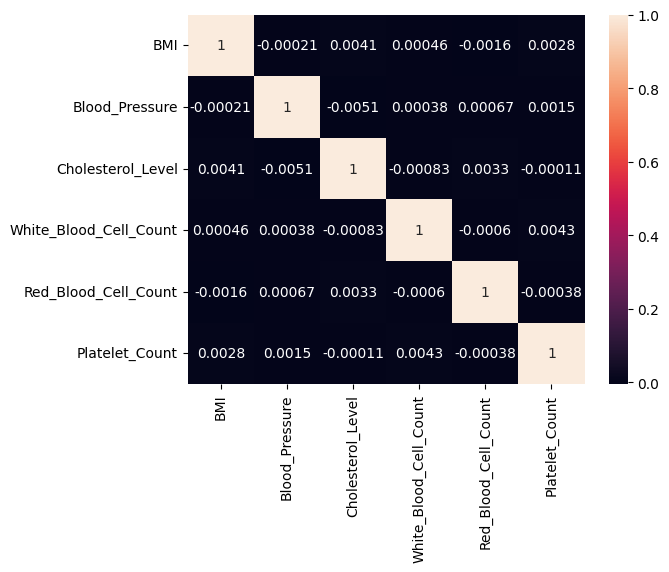

In [38]:
feature=['BMI','Blood_Pressure','Cholesterol_Level','White_Blood_Cell_Count','Red_Blood_Cell_Count','Platelet_Count']
X = model_df[feature]
y = model_df['Appendix_Cancer_Prediction']
sns.heatmap(X.corr(), annot=True)
plt.show()

### Remove features with high VIF (>10) to reduce multicollinearity. And add Odd ratio to have understand in categorical Data..

In [40]:

from sklearn.preprocessing import StandardScaler
def drop_high_vif(dataframe, threshold=10):
    while True:
        vif = calculate_vif(dataframe)
        max_vif = vif['VIF'].max()
        if max_vif < threshold:
            break
        feature_to_drop = vif.loc[vif['VIF'] == max_vif, 'feature'].values[0]
        #print(f"Dropping feature '{feature_to_drop}' with VIF: {max_vif}")
        dataframe = dataframe.drop(columns=[feature_to_drop])
    return dataframe

# Step 1: Prepare data
X = model_df[features]
y = model_df[target]

# Step 2: Remove features with high VIF
X_cleaned = drop_high_vif(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1,)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
#print(classification_report(y_test, y_pred))

# Step 6: Coefficients and Odds Ratios
coefficients = pd.DataFrame({
    'Feature': X_cleaned.columns,
    'Coefficient': model.coef_[0],
    'Odds_Ratio': np.exp(model.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)
print(coefficients)

Accuracy: 84.90%
                             Feature  Coefficient  Odds_Ratio
4                       Gender_Other     0.038518    1.039270
3                        Gender_Male     0.036266    1.036932
14            Radiation_Exposure_Yes     0.022075    1.022320
7       Alcohol_Consumption_Moderate     0.020796    1.021014
6            Alcohol_Consumption_Low     0.009731    1.009778
8          Family_History_Cancer_Yes     0.005728    1.005745
18           Symptom_Severity_Severe     0.004964    1.004976
17         Symptom_Severity_Moderate     0.003100    1.003105
13              Diet_Type_Vegetarian     0.002086    1.002088
12                   Diet_Type_Vegan     0.000659    1.000660
1               Diagnosis_Delay_Days    -0.000014    0.999986
2     Survival_Years_After_Diagnosis    -0.000365    0.999635
0                                Age    -0.000473    0.999527
16            Tumor_Markers_Positive    -0.002876    0.997128
9              Genetic_Mutations_Yes    -0.009116    

## Features selection
#### Use Recursive Feature Elimination (RFE)
#### RFE is a feature selection technique that recursively removes the least important features based on feature coefficients.
#### I'll use RFE to select the top features that contribute the most to the model.

In [41]:
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
# Perform RFE
rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust the number of features that you want to select
rfe.fit(X_train, y_train)
# Get selected features
selected_features = X_train.columns[rfe.support_]
#print("Selected Features:", selected_features)

# Train with selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]
model.fit(X_train_rfe, y_train)

# Evaluate accuracy
accuracy = model.score(X_test_rfe, y_test)
print(f"Accuracy with selected features: {accuracy * 100:.2f}%")


Accuracy with selected features: 84.90%


### Feature selection also didn't make any changes in Accuracy

## Cross-Validation
#### Next step i use cross-validation to train and evaluate the logistic regression model to see if there is improvment in accuracy.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model,X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean() * 100, cv_scores.std() * 100))


Cross-Validation Accuracy: 84.90% (+/- 0.10%)


### All of above technique showed the same accuracy rate (84.90%). 

### Conclussion: After all of above analysis, the perfermance of model shows a lit bit better than ref model which i took from kaggle.